In [20]:
URL = 'https://drive.google.com/file/d/1hdFfAk9A954GU4yuNc7_liyl-a90-5IM/view?usp=sharing'

In [22]:
import pandas as pd
import requests
from io import StringIO

file_id = URL.split('/')[-2]
# Download URL
dwn_url='https://drive.google.com/uc?export=download&id=' + file_id
url = requests.get(dwn_url).text
csv_raw = StringIO(url)
df = pd.read_csv(csv_raw)
print(df.head())
# do a to_csv

     Month  #Passengers
0  1949-01          112
1  1949-02          118
2  1949-03          132
3  1949-04          129
4  1949-05          121


In [23]:
from urllib.request import urlretrieve

urlretrieve(dwn_url, 'AirPassengers.csv')

('AirPassengers.csv', <http.client.HTTPMessage at 0x7f6661034250>)

In [24]:
df = pd.read_csv('AirPassengers.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [27]:
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [28]:
df['Month'] = pd.to_datetime(df.Month)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Month        144 non-null    datetime64[ns]
 1   #Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [30]:
df.head()

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


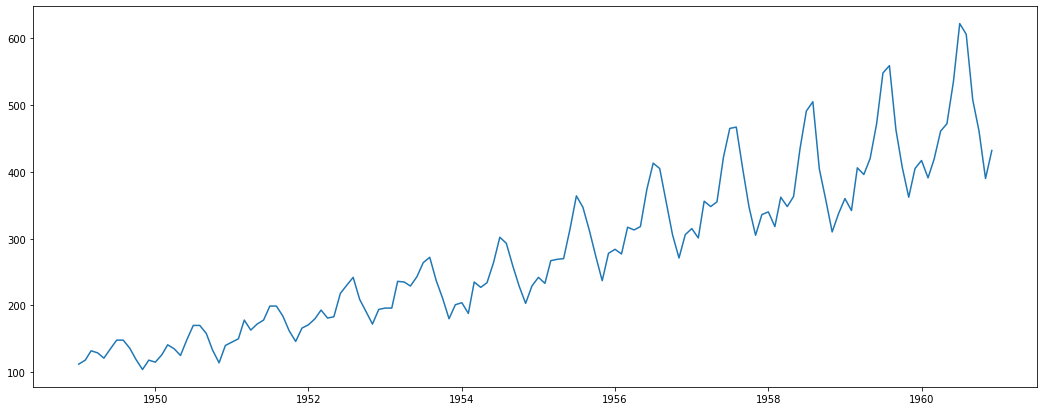

In [32]:
from matplotlib import pyplot as plt
%matplotlib inline

plt.figure(figsize=(18,7))
plt.plot(df.Month, df['#Passengers'])

In [33]:
df['Month_agg'] = df.Month.apply(lambda d: d.month)

In [34]:
_ = df.groupby('Month_agg').median().reset_index()
_

,Month_agg,#Passengers
0,1,223.0
1,2,214.5
2,3,251.5
3,4,252.0
4,5,252.0
5,6,289.5
6,7,333.0
7,8,320.0
8,9,285.5
9,10,251.5
